<a href="https://colab.research.google.com/github/donlee4u/ML_Class/blob/main/10%EC%A3%BC%EC%B0%A8_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

# 퍼셉트론(Perceptron)

<br>

<br>

- 입력(Feature) 데이터  $x = \begin{bmatrix}1\\ x_1\\ \vdots\\ x_d \end{bmatrix}      \quad  \quad $weights $\omega = \begin{bmatrix}\omega_0 \\ \omega_1 \\ \vdots\\ \omega_d \end{bmatrix}$

<br>

- 분류경계선(decision boundary) f(x)  : feature x 와 weight w 선형조합(linear combination)

<br>
$$f(x) = \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \cdots + w_d x_d = 0 \qquad (x_0 = 1)$$
<br>

$$\begin{align*} \text{If} \;
& \sum\limits_{i=1}^{d}\omega_ix_i > \text{threshold}, --> 1\\
\text{If} \;
& \sum\limits_{i=1}^{d}\omega_ix_i < \text{threshold}. --> -1
\end{align*}$$

<br><br>

$$h(x) = \text{sign} \left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)- \text{threshold} \right) = \text{sign}\left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)+ \omega_0\right) = \text{sign}\left( \sum\limits_{i=0}^{d}\omega_ix_i \right)$$
<br>
<br>

- Sign function :

<br>
$$
\text{sign}(x) =
\begin{cases}
1, &\text{if }\; x > 0\\
0, &\text{if }\; x = 0\\
-1, &\text{if }\; x < 0
\end{cases} $$

- vector form
<br>

$$h(x) = \text{sign}\left( \omega^T x \right)$$

<br>

__Perceptron Diagram__
<br><br>
<center>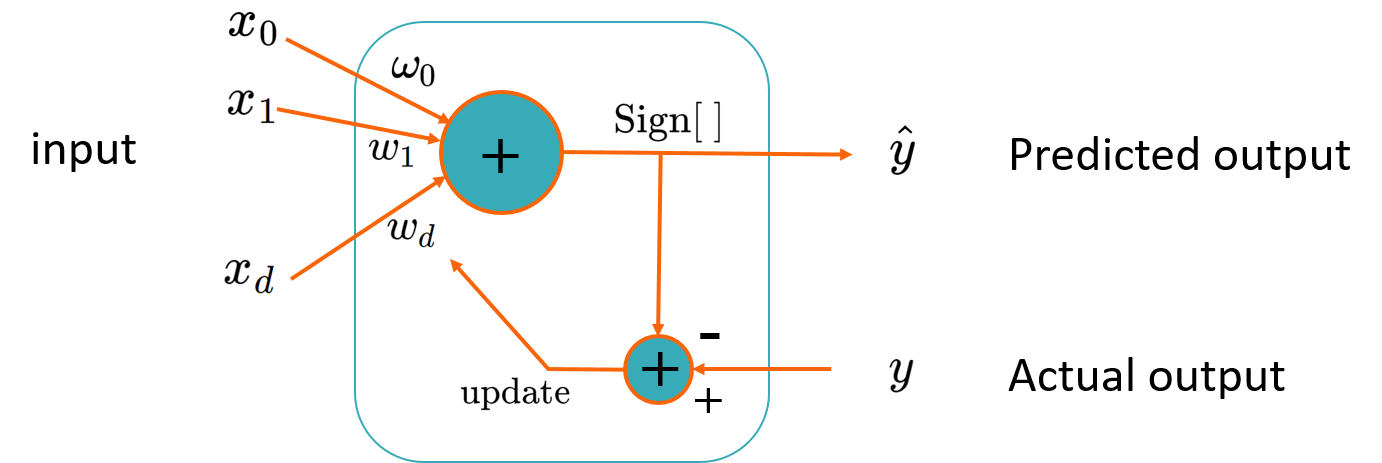</center>
<br><br>


<br>

# Perceptron Algorithm

<br>

- The perceptron 예측함수  $$ \quad  \hat{y} = h(x) = \text{sign}\left( \omega^Tx \right)$$

<br>

- 학습 데이터 set

$$(x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N) \quad \text{where } y_i \in \{-1,1\}$$

<br>

1. 예측값과 실제값이 서로 다른 점만 선택해서 w를 업데이트

<br>
$$ \hat{y} =\text{sign}\left(\omega^Tx_n \right) \neq y_n$$

<br>

2. Weight vector w값을 반복적으로 업데이트

<br>

$$\omega \leftarrow \omega + y_nx_n$$
<br>


<br>

__Perceptron Updates 증명__

<br>

- Let's look at a misclassified positive example ($y_n = +1$)
  - perceptron (wrongly) thinks $\omega_{old}^T x_n < 0$

<br>

- Updates would be

<br>

$$ \begin{align*}\omega_{new} &= \omega_{old} + y_n x_n = \omega_{old} + x_n \\ \\
\omega_{new}^T x_n &= (\omega_{old} + x_n)^T x_n = \omega_{old}^T x_n + x_n^T x_n  \geq \omega_{old}^T x_n \end{align*}$$

<br>

- Thus $\omega_{new}^T x_n$ is <font color='red'>less negative</font> than $\omega_{old}^T x_n$

<br>

# Perceptron in Python


$$f(x) = \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \omega_2x_2  = 0 \qquad (x_0 = 1)$$

<br>

$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix} \qquad
x = \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)}\\\vdots & \vdots & \vdots \\ 1 & x_1^{(m)} & x_2^{(m)}\end{bmatrix} \qquad
y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$

<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#training data gerneration
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

f = 0.8*x1 + x2 - 3

In [ ]:
C1 = np.where(f >= 1)
C0 = np.where(f < -1)
print(C1)
print(C0)

In [ ]:
C1 = np.where(f >= 1)[0]
C0 = np.where(f < -1)[0]
print(C1)
print(C0)
print(C1.shape)
print(C0.shape)

[ 2  3  7  8 14 16 19 21 23 26 27 29 30 31 32 33 35 44 45 46 51 53 64 67
 68 72 73 74 78 81 84 85 90 91 92 99]
[ 0  1  4  6  9 10 12 13 17 18 20 24 25 36 37 38 39 40 41 42 43 47 48 50
 54 58 59 60 61 63 65 66 70 71 75 77 80 82 83 87 94 95]
(36,)
(42,)


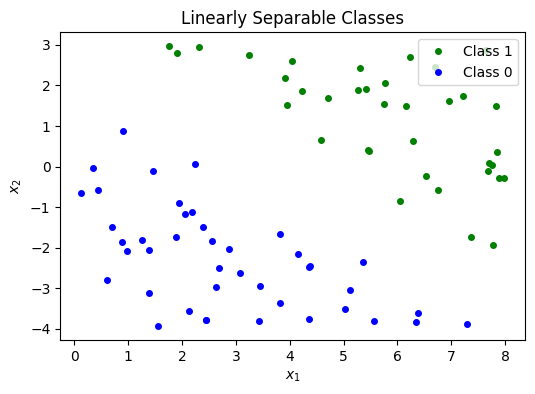

In [ ]:
plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 4, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 4, label = 'Class 0')
plt.title('Linearly Separable Classes')
plt.legend(loc = 1)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

$$
\begin{align*}
\omega &= \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix} \qquad
x = \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} \\ 1 & x_1^{(3)} & x_2^{(3)}\\\vdots & \vdots & \vdots \\ 1 & x_1^{(m)} & x_2^{(m)}\end{bmatrix} \qquad
y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$

<br>

In [ ]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([C0.shape[0],1]), x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

In [ ]:
X0.shape

(42, 3)

<br>

$$\omega = \begin{bmatrix} \omega_0 \\ \omega_1 \\ \omega_2\end{bmatrix} \qquad  \omega \leftarrow \omega + yx \qquad $$where $(x, y)$ is a misclassified training point

<br>

In [ ]:
w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = y.shape[0]
for k in range(n_iter):
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]:
            w += y[i,0]*X[i,:].T

print(w)

[[-18.        ]
 [  6.69843184]
 [ 12.64699591]]


<br>

$$
\begin{align*}
f(x) &= \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \omega_2x_2  = 0  \qquad ----> \qquad  x_2 = -\frac{\omega_1}{\omega_2} x_1 - \frac{\omega_0}{\omega_2}
\end{align*}
$$
<br>

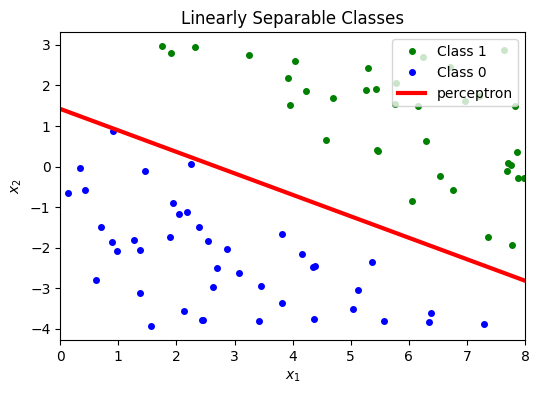

In [ ]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 4, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 4, label = 'Class 0')
plt.plot(x1p, x2p, c = 'r', linewidth = 3, label = 'perceptron')
plt.title('Linearly Separable Classes')
plt.xlim([0, 8])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 1)
plt.show()


<br>

__Perceptron using Scikit-Learn__

<br><br>

$$
\begin{align*}
x &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T\\ \vdots \\ \left(x^{(m)}\right)^T \end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)}\\ \vdots & \vdots \\ x_1^{(m)} & x_2^{(m)}\end{bmatrix} \qquad
y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ y^{(3)}\\ \vdots \\ y^{(m)} \end{bmatrix}
\end{align*}$$

<br>

In [ ]:
X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

In [ ]:
from sklearn import linear_model

clf = linear_model.Perceptron(tol=1e-3)
clf.fit(X, np.ravel(y))

Perceptron()

In [ ]:
clf.predict([[3, -2]])

array([-1.])

In [ ]:
clf.predict([[6, 2]])

array([1.])

In [ ]:
clf.coef_

array([[11.20321716, 16.04069632]])

In [ ]:
clf.intercept_

array([-23.])

<br>

$$
\begin{align*}
f(x) &= \omega_0 + \omega^Tx  = \omega_0 + \omega_1x_1 + \omega_2x_2  = 0  \qquad ----> \qquad  x_2 = -\frac{\omega_1}{\omega_2} x_1 - \frac{\omega_0}{\omega_2}
\end{align*}
$$
<br>

In [ ]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]
print(w0, w1, w2)

-23.0 11.203217159166506 16.040696324973034


<Figure size 600x400 with 0 Axes>

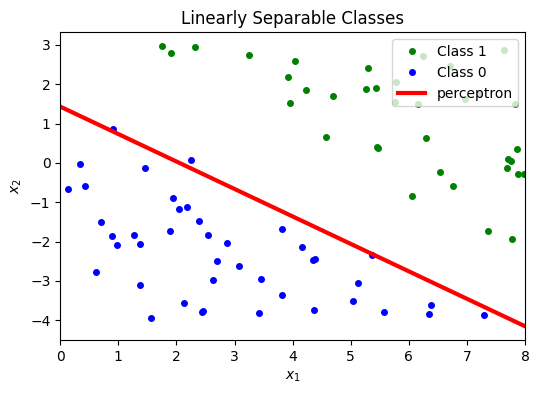

In [ ]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w1/w2*x1p - w0/w2

plt.figure(figsize = (6, 4))
plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 4, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 4, label = 'Class 0')
plt.plot(x1p, x2p, c = 'r', linewidth = 3, label = 'perceptron')
plt.title('Linearly Separable Classes')
plt.xlim([0, 8])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 1)
plt.show()


<br>

# <font size='6'><b>Artificial Neural Networks (ANN)
</b>


## Perceptron for $h_{\omega}(x)$


<br>

$$
\begin{align*}
a &= \omega_0 + \omega_1 x_1 + \omega_2 x_2 \\ \\
\hat{y} &= g(a) =
\begin{cases}
1 & a > 0\\
0 & \text{otherwise}
\end{cases}
\end{align*}
$$


<br><br>
<center>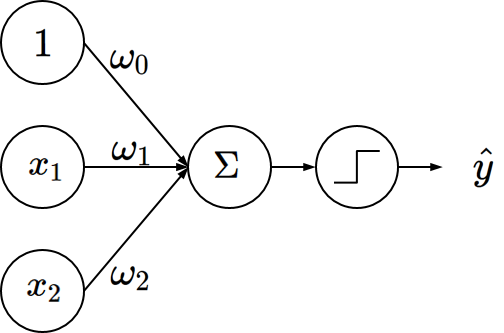</center>

<br>

- Multi-Layer Perceptron (MLP) = Artificial Neural Networks (ANN)

<br><br>
<center>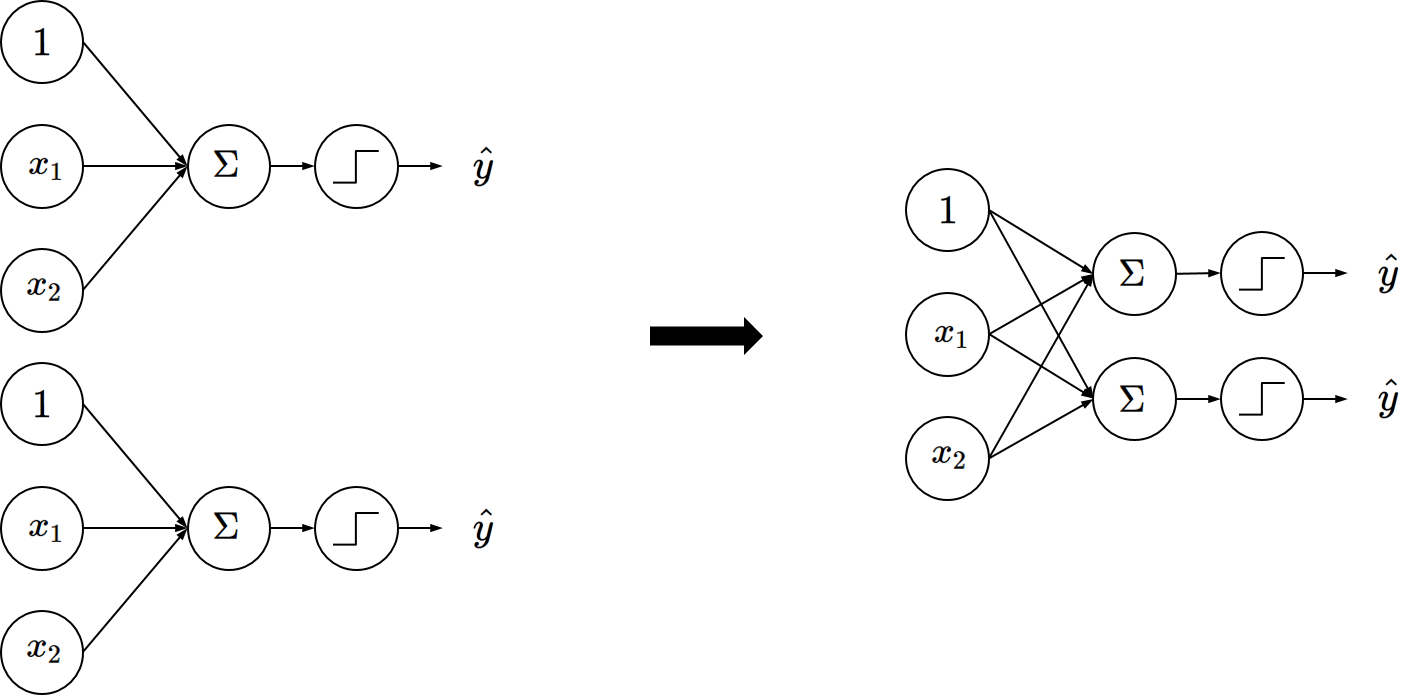</center>
<br><br>

<br>
<center>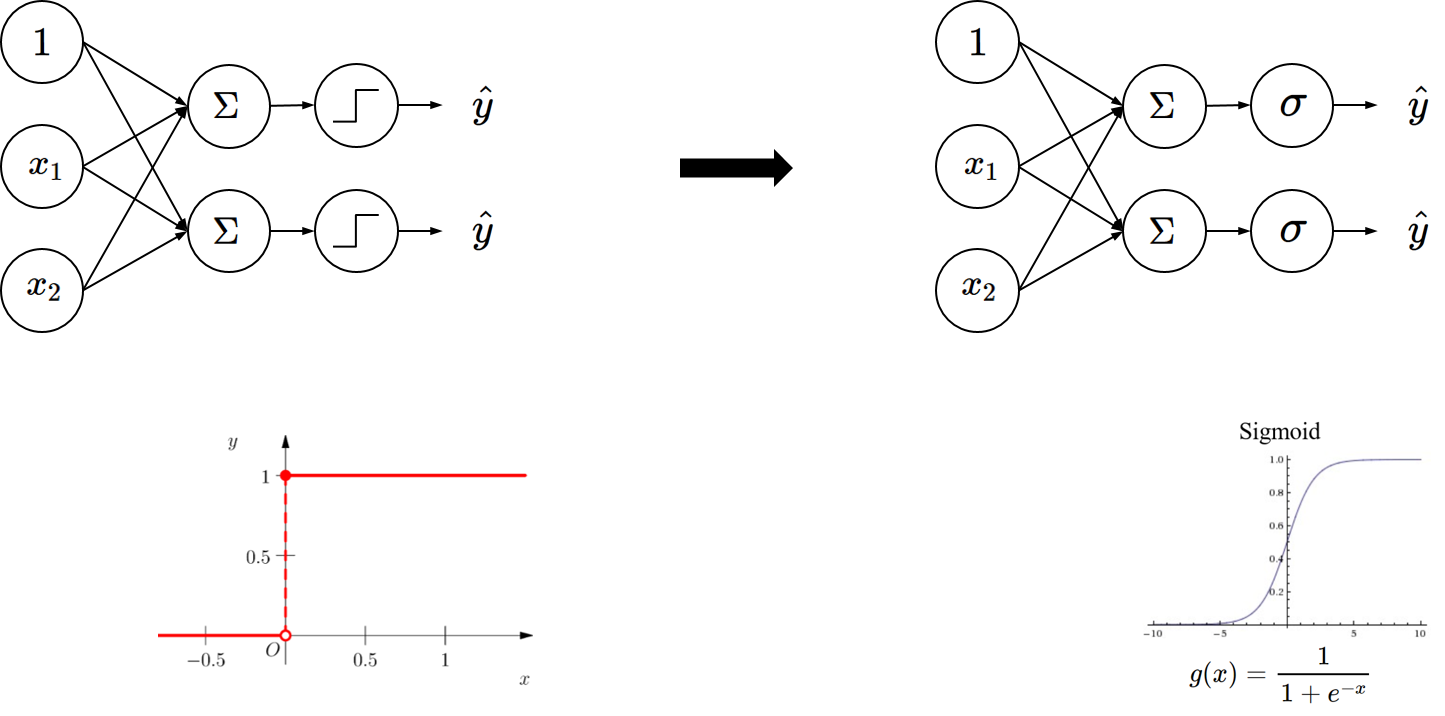</center>
<br><br>

<br>
<center>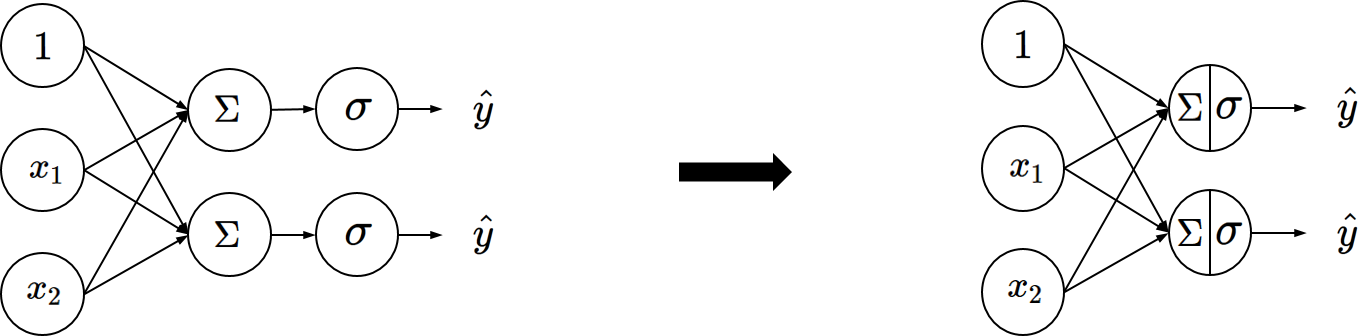</center>

<br>

- Multi-layer perceptron


<br>
<center>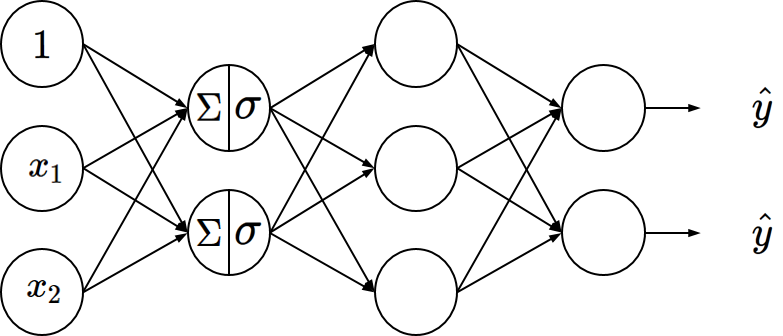</center>

<br>

## ANN에서의 logistic regression

- 선형 분리 가능한 logistic regression
<br>

$$
\begin{align*}
y^{(i)} &\in \{0, 1\}\\\\
y &= \sigma (\omega_0 + \omega_1 x_1 + \omega_2 x_2)
\end{align*}
$$

<br>

- 학습 후 선형 분리 경계선(linear classification boundary) :  $\omega_0 + \omega_1 x_1 + \omega_2 x_2 = 0$
<br>

<br>
<center>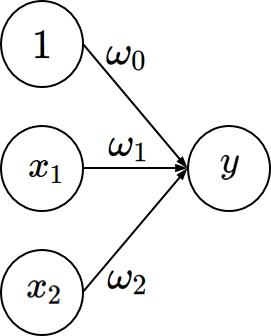</center>
<br><br>

### training data gerneration

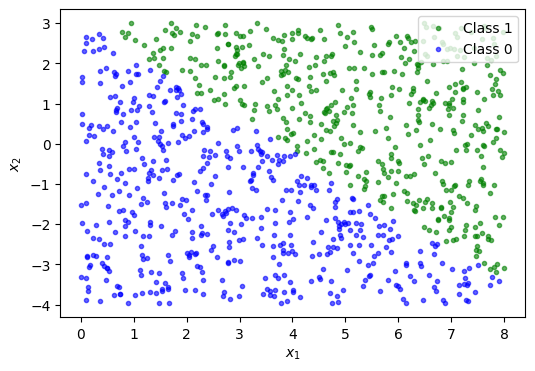

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

#training data gerneration
m = 1000
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4
g = 0.8*x1 + x2 - 3

C1 = np.where(g >= 0)[0]   # g가 true인 인덱스 값을 return
C0 = np.where(g < 0)[0]    # g가 false인 인덱스 값을 return

M = C0.shape[0]
N = C1.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

train_X = np.asmatrix(train_X)
train_y = np.asmatrix(train_y)

X = np.hstack([np.ones([m,1]), train_X])
X = np.asmatrix(X)

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')

plt.legend(loc = 1)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

### 경사하강법

In [ ]:
# 예측함수(Hypothesis function) 정의
def h(x,w):
    return 1/(1 + np.exp(-x*w))

In [ ]:
w = np.zeros([3,1])

alpha = 0.01

for i in range(10000):
    df = -X.T*(train_y - h(X,w))
    w = w - alpha*df

print(w)

[[-65.56966973]
 [ 17.48575688]
 [ 21.73151314]]


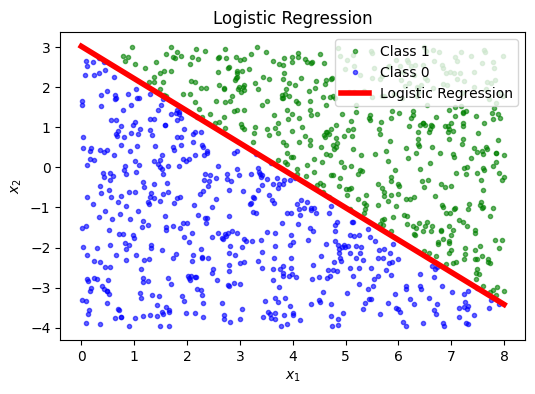

In [ ]:
xp = np.linspace(0,8,100).reshape(-1,1)
yp = - w[1,0]/w[2,0]*xp - w[0,0]/w[2,0]


plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.plot(xp, yp, 'r', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc = 1)
plt.show()

### Keras

In [ ]:
LogisticRegression = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_dim = 2,
                          units = 1,
                          activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
LogisticRegression.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                           loss = 'binary_crossentropy')

In [ ]:
loss = LogisticRegression.fit(train_X, train_y, epochs = 100)

In [ ]:
w = LogisticRegression.layers[0].get_weights()[0]
b = LogisticRegression.layers[0].get_weights()[1]

print('Weight w =',w[0], w[1])
print('Bias b =',b)

Weight w = [2.096205] [2.6585548]
Bias b = [-7.6366487]


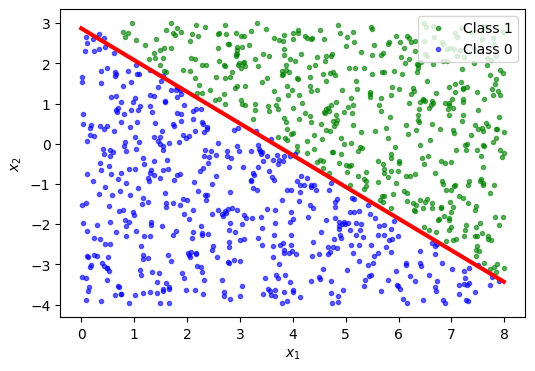

In [ ]:
x1p = np.arange(0, 8, 0.01).reshape(-1, 1)
x2p = - w[0,0]/w[1,0]*x1p - b[0]/w[1,0]

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.plot(x1p, x2p, 'r', linewidth = 3, label = '')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 1)
plt.show()

<br>

## Nonlinear Classification

- 한개의 퍼셉트론으로 해결할 수 없음
- 여러개의 퍼셉트론(Multi-layer perceptron(MLP))을 사용해서 해결
- Weights : $\omega$
- Bias : $b$ = $\omega_0$
<br>

$$y = \sigma(\omega_0 + \omega_1 x_1 + \omega_2 x_2) \quad \longrightarrow \quad y = \sigma(b + \omega_1 x_1 + \omega_2 x_2)$$
<br>

<br>
<center>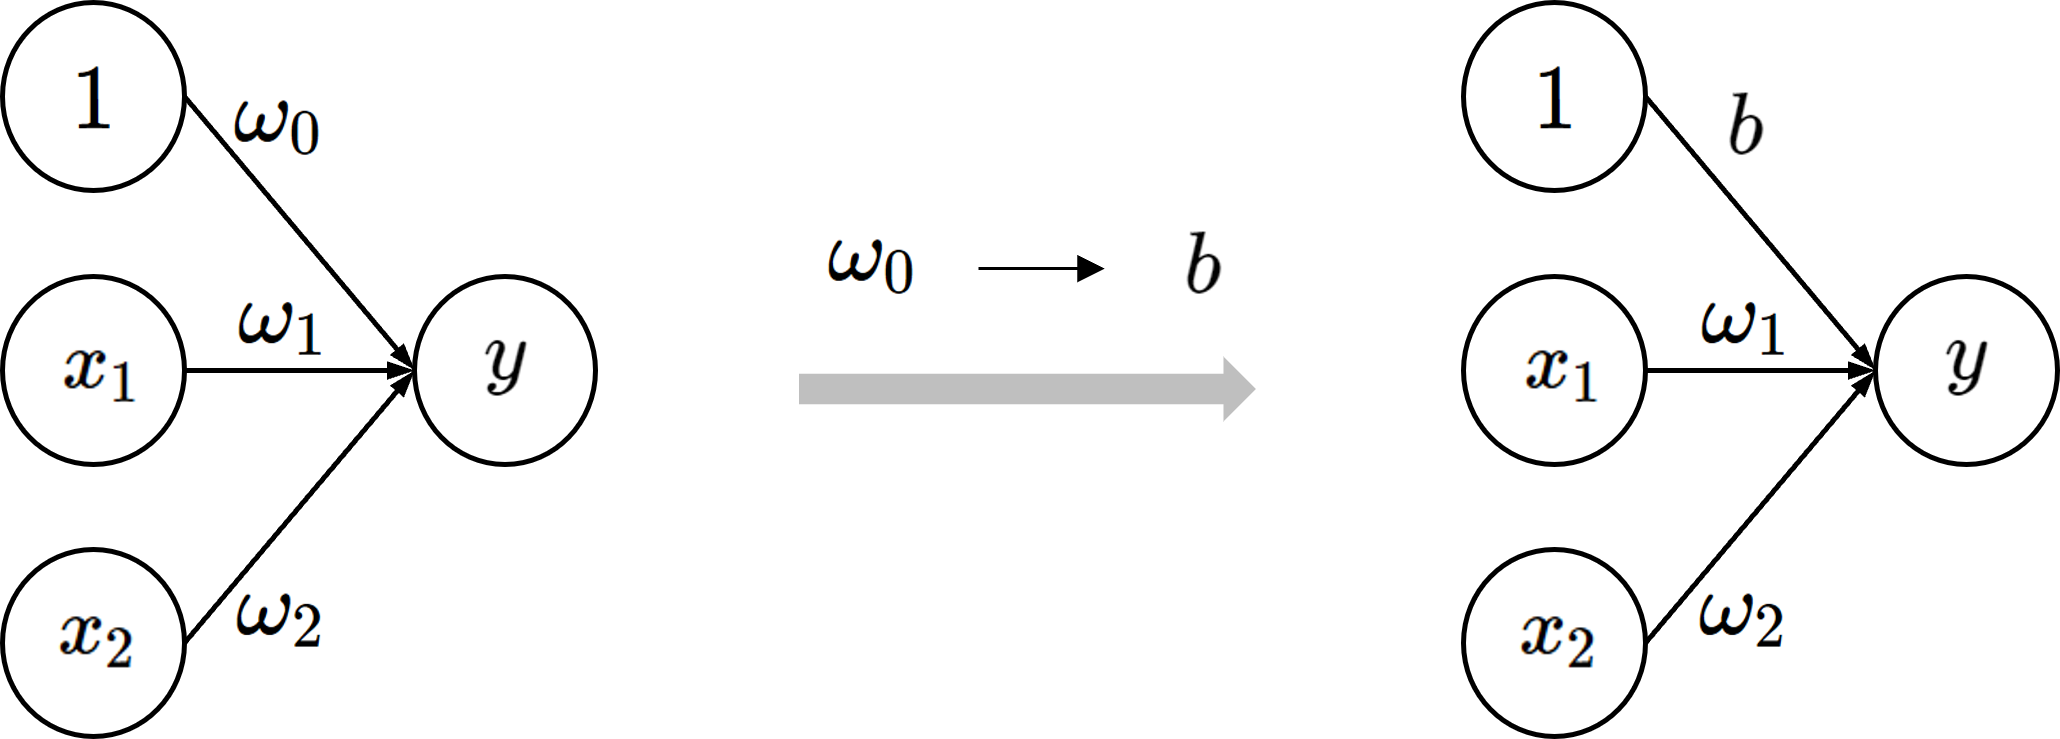</center><br><br>

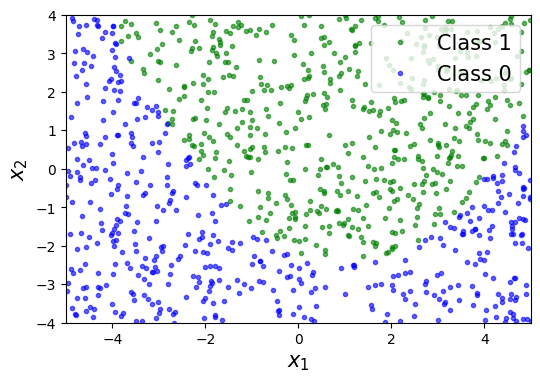

In [ ]:
# training data gerneration

m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4

g = - 0.5*(x1-1)**2 + 2*x2 + 5
#g = -2*(x1-1)**2 + 2*x2 + 5
C1 = np.where(g >= 0)[0]
C0 = np.where(g < 0)[0]
N = C1.shape[0]
M = C0.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_X = np.asmatrix(train_X)

train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

<br>

- 2개의 퍼셉트론을 사용해서 비직선의 분류경계선(non-linear decision boundary)을 근사화함
- 은닉층(hidden layer) 추가 : 2개의 뉴런과 bias를 가짐

<br>

<center>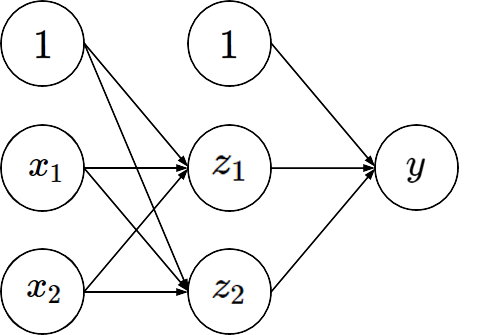</center><br><br>

In [ ]:
LogisticRegression = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_dim = 2, units = 2, activation = 'sigmoid'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
LogisticRegression.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                           loss = 'binary_crossentropy')

In [ ]:
w1 = LogisticRegression.layers[0].get_weights()[0]
b1 = LogisticRegression.layers[0].get_weights()[1]

w2 = LogisticRegression.layers[1].get_weights()[0]
b2 = LogisticRegression.layers[1].get_weights()[1]

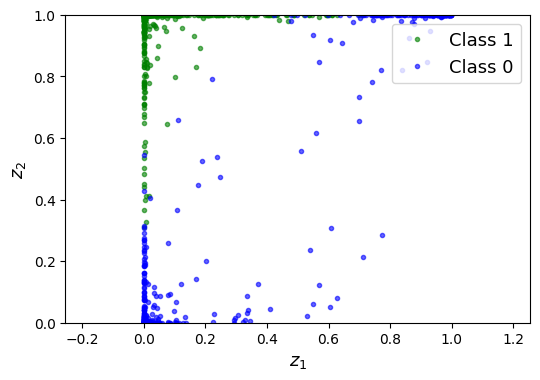

In [ ]:
H = train_X*w1 + b1
H = 1/(1 + np.exp(-H))

plt.figure(figsize = (6, 4))
plt.plot(H[0:N,0], H[0:N,1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.xlabel('$z_1$', fontsize = 13)
plt.ylabel('$z_2$', fontsize = 13)
plt.legend(loc = 1, fontsize = 13)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

<br>

- $z$-공간의 피처 $z_1$ and $z_2$ 는 시그모이드 함수를 사용하기 때문에 $(0,1)$ 사이의 값을 가짐

- Bounded Output Range: 비선형 변환에 의해 입력값과 상관없이 정규화된 출력값을 가짐

- Feature Redistribution: 은닉층은 입력 데이터를 새로운 특징 공간으로 재분배하여 선형적으로 분리될 수 있게 함.

<br>

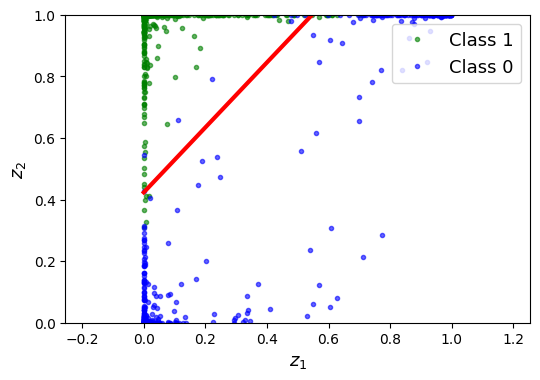

In [ ]:
x1p = np.arange(0, 1, 0.01).reshape(-1, 1)
x2p = - w2[0,0]/w2[1,0]*x1p - b2[0]/w2[1,0]

plt.figure(figsize = (6, 4))
plt.plot(H[0:N,0], H[0:N,1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(H[N:m,0], H[N:m,1], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.plot(x1p, x2p, 'r', linewidth = 3, label = '')
plt.xlabel('$z_1$', fontsize = 13)
plt.ylabel('$z_2$', fontsize = 13)
plt.legend(loc = 1, fontsize = 13)
plt.axis('equal')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

<br>

- $z$-공간에서의 선형 경계선 : $z_1$ and $z_2$ 가 입력 데이터를 선형으로 구분하는 특징공간으로 재구성
- 은닉층(hidden layer)는 비선형으로 분포되어 있는 데이터를 고차원 공간으로 투영하여 선형적으로 분리할 수 있도록 함

<br>

In [ ]:
x1p = np.arange(-5, 5, 0.01).reshape(-1, 1)
x2p = - w1[0,0]/w1[1,0]*x1p - b1[0]/w1[1,0]
x3p = - w1[0,1]/w1[1,1]*x1p - b1[1]/w1[1,1]

plt.figure(figsize = (6, 4))
plt.plot(x1[C1], x2[C1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.plot(x1p, x2p, 'r', linewidth = 3, label = '')
plt.plot(x1p, x3p, 'm', linewidth = 3, label = '')
plt.xlabel('$x_1$', fontsize = 13)
plt.ylabel('$x_2$', fontsize = 13)
plt.legend(loc = 1, fontsize = 13)
plt.axis('equal')
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

<br>

- 학습 후, $x$-공간(입력공간)에서 은닉층 뉴런에 의해 형성된 선형경계선(2개의 퍼셉트론)으로 비선형 데이터 구성을 분류할 수 있음

<br>

## Multi perceptron

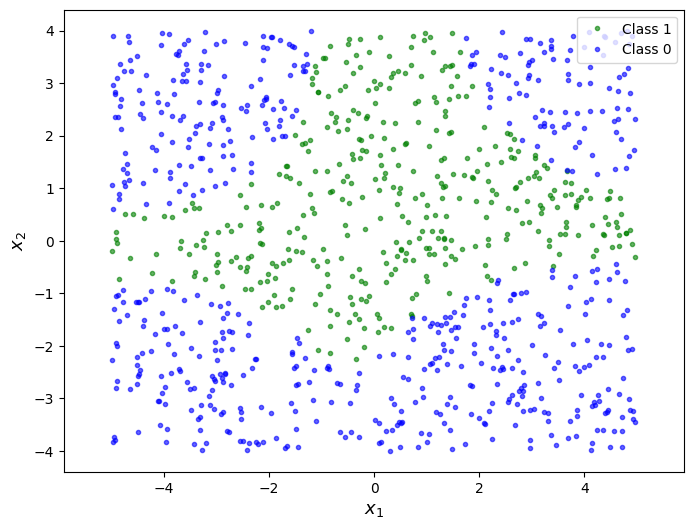

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

#training data gerneration
m = 1000
x1 = 10*np.random.rand(m, 1) - 5
x2 = 8*np.random.rand(m, 1) - 4
#g = -0.9*(x1*x2-1)**2 + 2*x2 + 5
g = -0.5*(x1*x2-1)**2 + 2*x2 + 5

C1 = np.where(g >= 0)[0]   # g가 true인 인덱스 값을 return
C0 = np.where(g < 0)[0]    # g가 false인 인덱스 값을 return

M = C0.shape[0]
N = C1.shape[0]
m = N + M

X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

train_X = np.vstack([X1, X0])
train_y = np.vstack([np.ones([N,1]), np.zeros([M,1])])
ohe = OneHotEncoder(handle_unknown = 'ignore')
train_y = ohe.fit_transform(train_y).toarray()

train_X = np.asmatrix(train_X)
train_y = np.asmatrix(train_y)

plt.figure(figsize = (8, 6))
plt.plot(x1[C1], x2[C1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.xlabel('$x_1$', fontsize = 13)
plt.ylabel('$x_2$', fontsize = 13)
plt.legend(loc = 1, fontsize = 13)
plt.axis('equal')
plt.legend(loc = 1)
plt.show()

In [ ]:
train_y

matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])

In [ ]:
n_input = 2
n_hidden = 4
n_output = 2

In [ ]:
def build_model(x, weights, biases):
    hidden = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    hidden = tf.nn.sigmoid(hidden)
    output = tf.add(tf.matmul(hidden, weights['out']), biases['out'])
    return output

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden])),
    'out': tf.Variable(tf.random.normal([n_hidden, n_output]))
}

biases = {
    'h1' : tf.Variable(tf.random.normal([n_hidden], stddev=0.1)),
    'out': tf.Variable(tf.random.normal([n_output], stddev=0.1))
}

x = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 2], dtype=tf.float32)

In [ ]:
pred = build_model(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(loss)

LR = 0.01
optm = tf.train.GradientDescentOptimizer(LR).minimize(loss)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

n_batch = 50
n_iter = 80000
n_prt = 250

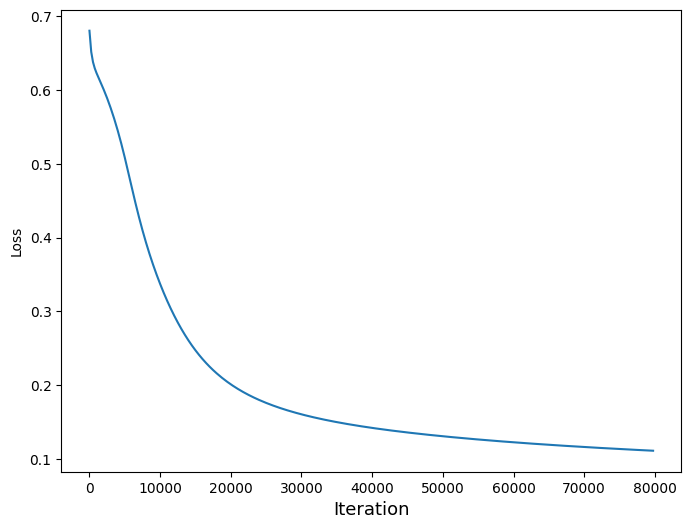

In [ ]:
# Training cycle
loss_record = []
for epoch in range(n_iter):
    sess.run(optm, feed_dict={x: train_X, y: train_y})
    if (epoch+1) % n_prt == 0:
        loss_record.append(sess.run(loss, feed_dict={x: train_X, y: train_y}))
w_hat = sess.run(weights)
b_hat = sess.run(biases)

plt.figure(figsize = (8, 6))
plt.plot(np.arange(len(loss_record))*n_prt, loss_record)
plt.xlabel('Iteration', fontsize = 13)
plt.ylabel('Loss')
plt.show()


In [ ]:
x1p = np.arange(-5, 5, 0.01).reshape(-1, 1)
x2p = - w_hat['h1'][0,0]/w_hat['h1'][1,0]*x1p - b_hat['h1'][0]/w_hat['h1'][1,0]
x3p = - w_hat['h1'][0,1]/w_hat['h1'][1,1]*x1p - b_hat['h1'][1]/w_hat['h1'][1,1]
x4p = - w_hat['h1'][0,2]/w_hat['h1'][1,2]*x1p - b_hat['h1'][2]/w_hat['h1'][1,2]
x5p = - w_hat['h1'][0,3]/w_hat['h1'][1,3]*x1p - b_hat['h1'][3]/w_hat['h1'][1,3]

plt.figure(figsize = (8, 6))
plt.plot(x1[C1], x2[C1], 'go', markersize = 3, alpha = 0.6, label = 'Class 1')
plt.plot(x1[C0], x2[C0], 'bo', markersize = 3, alpha = 0.6, label = 'Class 0')
plt.plot(x1p, x2p, 'r', linewidth = 3, label = '')
plt.plot(x1p, x3p, 'm', linewidth = 3, label = '')
plt.plot(x1p, x4p, 'y', linewidth = 3, label = '')
plt.plot(x1p, x5p, 'k', linewidth = 3, label = '')
plt.xlabel('$x_1$', fontsize = 13)
plt.ylabel('$x_2$', fontsize = 13)
plt.legend(loc = 1, fontsize = 13)
plt.axis('equal')
plt.xlim([-5, 5])
plt.ylim([-4, 4])
plt.show()

## **Backpropagation algorithm of Multi Layer Perceptron (MLP) using the numpy**

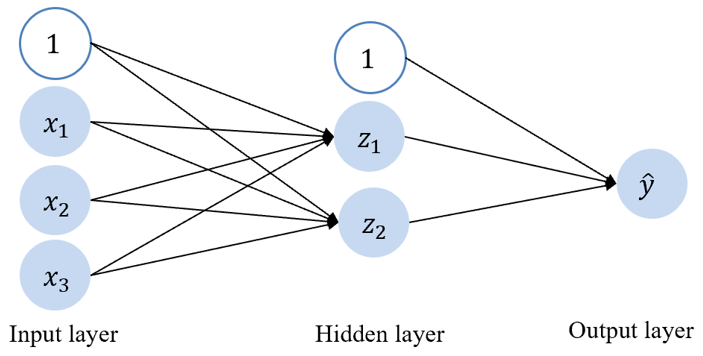

**Multi layer perceptron - Training**
- Step 0: Prepare Data / Weight & Bias Initialization
- Step 1: Feedforward
- Step 2: Evaluate Loss
- Step 3: Backpropagation

###  Step0: Prepare Data / Weight & Bias Initialization

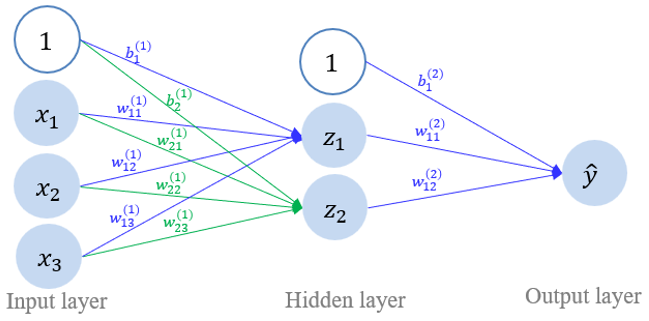

In [ ]:
# MLP for numpy
import numpy as np
import matplotlib.pyplot as plt

# Generating a synthetic dataset for regression
np.random.seed(0)
num_samples = 300

# Features: Three independent variables
feature1 = np.random.uniform(0, 1, num_samples)
feature2 = np.random.uniform(0, 1, num_samples)
feature3 = np.random.uniform(0, 1, num_samples)

# Combine the features into a NumPy array
Input = np.column_stack((feature1, feature2, feature3))

# Target: A linear combination of the features plus some noise
y = 2.5 * feature1 + 1.5 * feature2 - feature3

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Network parameters
input_layer_size = 3  # Input layer neurons
hidden_layer_size = 2  # Hidden layer neurons
output_layer_size = 1  # Output layer neurons

# Weights and biases
W1 = np.random.rand(hidden_layer_size, input_layer_size)
b1 = np.random.rand(hidden_layer_size)
W2 = np.random.rand(output_layer_size, hidden_layer_size)
b2 = np.random.rand(output_layer_size)


###  Step 1: Feed forward

- Input layer $\rightarrow$ Hidden layer

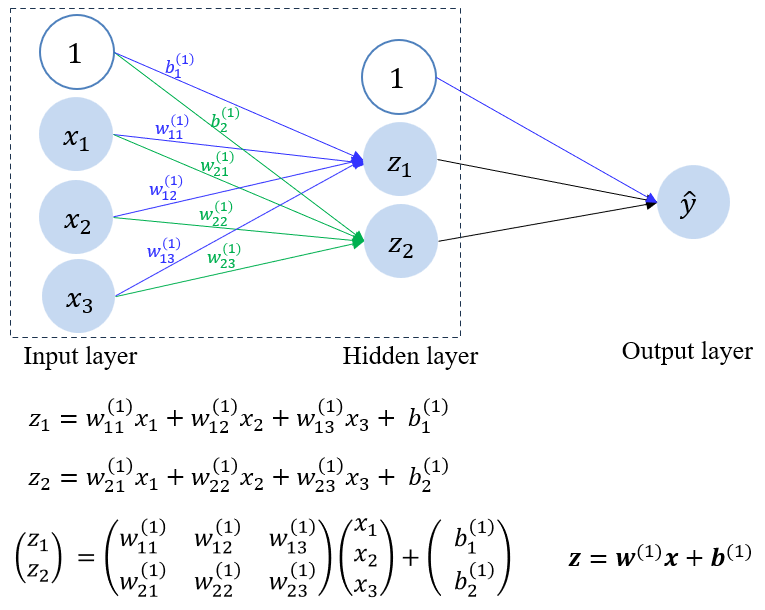

###  Step 1: Feed forward

- Hidden layer $\rightarrow$ Output layer

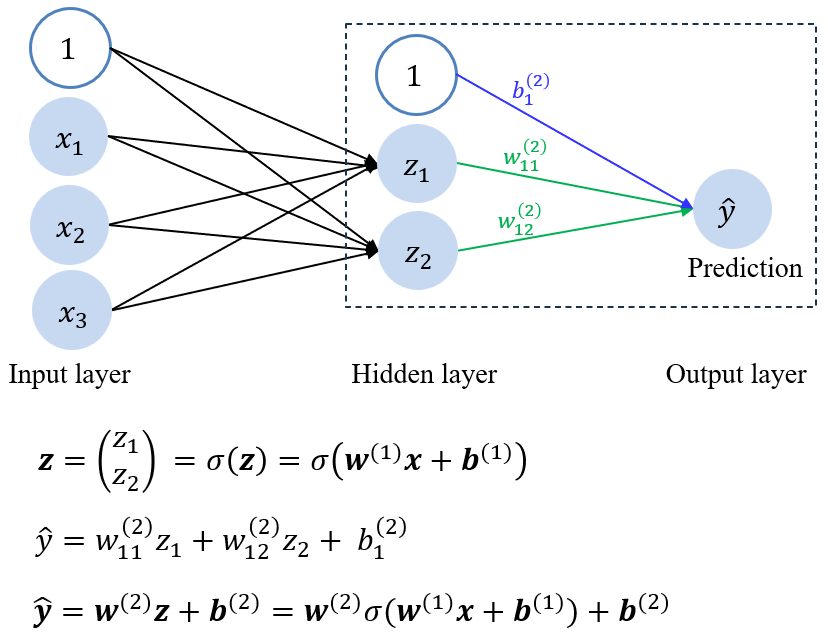

        # Feedforward
        Y_tilde = W1@X.reshape(-1,1)+ b1.reshape(-1,1)
        Y = sigmoid(Y_tilde)
        Z = W2@Y.reshape(-1,1) + b2.reshape(-1,1)

### Step 2: Evaluate Loss (Mean squared error, MSE / Mean Averaged Percentage Error, MAPE)

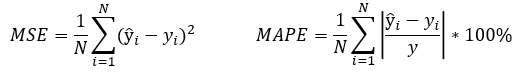
- Cost 함수 : $J =  1/2(\hat{y} - y)^{2}$

- Error를 최소로 하는 weights와 bias를 구하는 것이 목표
<br>
$\frac{\partial J}{\partial w^{(1)}_{11}},
\frac{\partial J}{\partial w^{(1)}_{12}}, \dots , \frac{\partial J}{\partial w^{(2)}_{21}}, \frac{\partial J}{\partial b^{(1)}_{1}},
\frac{\partial J}{\partial b^{(1)}_{2}},  \frac{\partial J}{\partial b^{(2)}_{1}}$

In [ ]:
# Calculating the error
J = 1/2*(y_pred-y[iter])**2
MSE += J
MAPE += np.abs((y_pred-y[iter])/y[iter])*100

### Step 3: Backpropagation

- Output layer --> Hidden layer

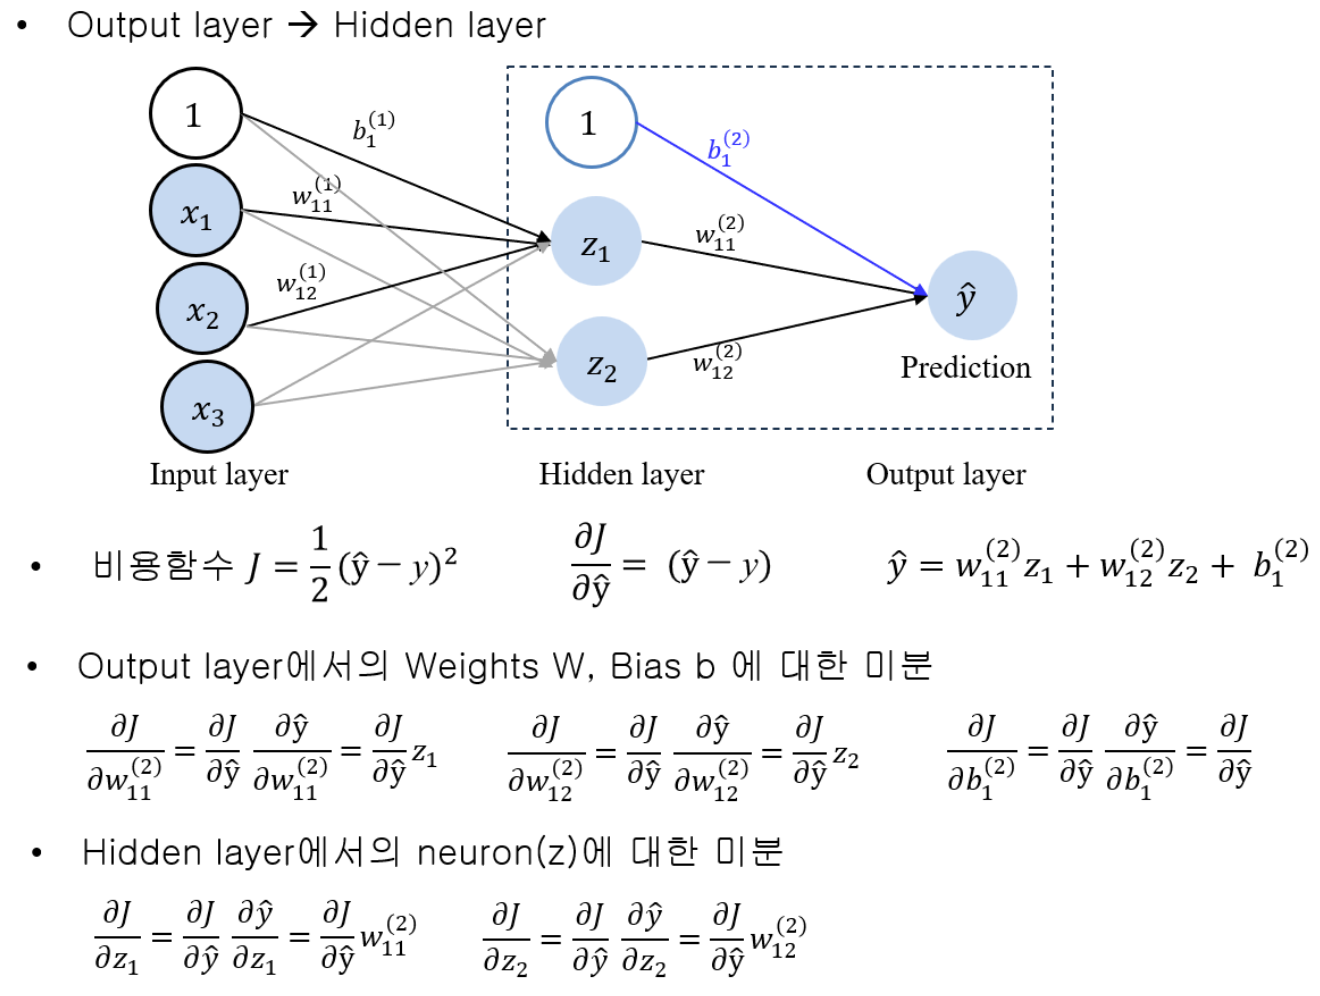


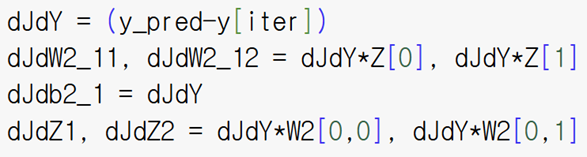

### Step 3: Backpropagation

- Hidden layer --> Input layer

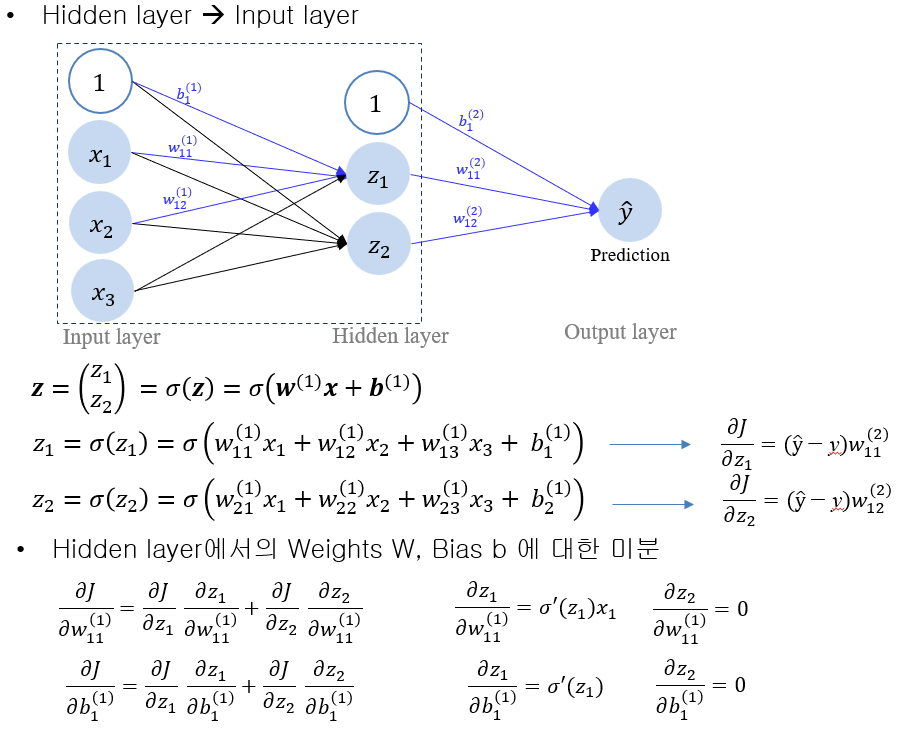

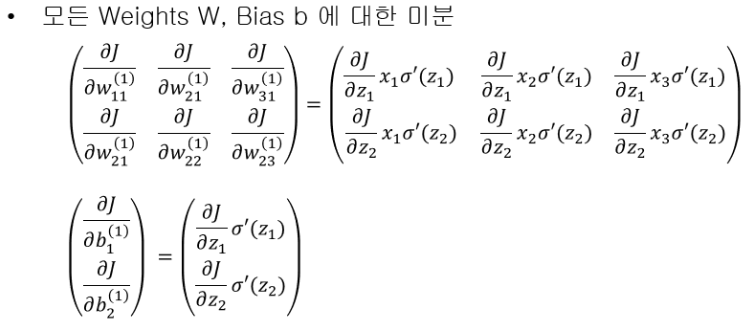

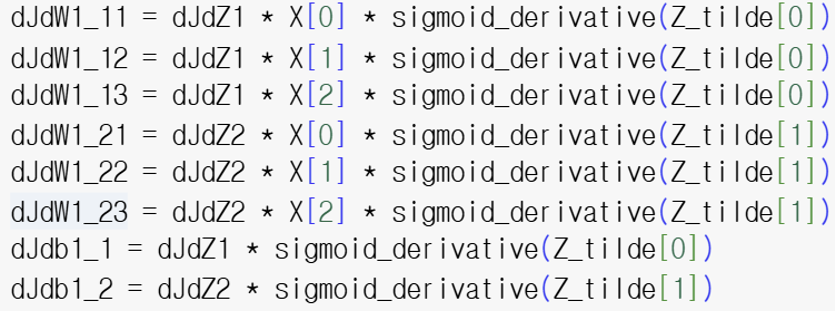

### Step 3: Backpropagation(W, b update)


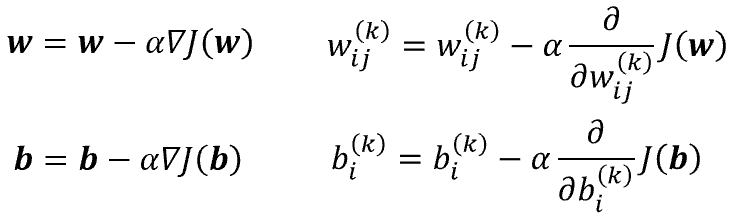

### Source Code



In [ ]:
# MLP for numpy
import numpy as np
import matplotlib.pyplot as plt

# Generating a synthetic dataset for regression
np.random.seed(0)
num_samples = 300

# Features: Three independent variables
feature1 = np.random.uniform(0, 1, num_samples)
feature2 = np.random.uniform(0, 1, num_samples)
feature3 = np.random.uniform(0, 1, num_samples)

# Combine the features into a NumPy array
Input = np.column_stack((feature1, feature2, feature3))

# Target: A linear combination of the features plus some noise
y = 2.5 * feature1 + 1.5 * feature2 - feature3

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Network parameters
input_layer_size = 3  # Input layer neurons
hidden_layer_size = 2  # Hidden layer neurons
output_layer_size = 1  # Output layer neurons

# Weights and biases
W1 = np.random.rand(hidden_layer_size, input_layer_size)
b1 = np.random.rand(hidden_layer_size)
W2 = np.random.rand(output_layer_size, hidden_layer_size)
b2 = np.random.rand(output_layer_size)

alpha = 1e-1 #learning rate
epochs = 50
MSE_list, MAPE_list = [], []
for epoch in range(epochs):
    MSE, MAPE = 0,0
    for iter in range(num_samples):
        X = Input[iter]
        # Feedforward
        Z_tilde = W1@X.reshape(-1,1)+ b1.reshape(-1,1)
        Z = sigmoid(Z_tilde)
        y_pred = W2@Z.reshape(-1,1) + b2.reshape(-1,1)

        # Calculating the error
        J = 1/2*(y_pred-y[iter])**2
        MSE += J
        MAPE += np.abs((y_pred-y[iter])/y[iter])*100

        # Backpropagation
        # Output layer --> hidden layer
        dJdY = (y_pred-y[iter])
        dJdW2_11, dJdW2_12 = dJdY*Z[0], dJdY*Z[1]
        dJdb2_1 = dJdY
        dJdZ1, dJdZ2 = dJdY*W2[0,0], dJdY*W2[0,1]

        # Hidden layer --> Input layer
        dJdW1_11 = dJdZ1 * X[0] * sigmoid_derivative(Z_tilde[0])
        dJdW1_12 = dJdZ1 * X[1] * sigmoid_derivative(Z_tilde[0])
        dJdW1_13 = dJdZ1 * X[2] * sigmoid_derivative(Z_tilde[0])
        dJdW1_21 = dJdZ2 * X[0] * sigmoid_derivative(Z_tilde[1])
        dJdW1_22 = dJdZ2 * X[1] * sigmoid_derivative(Z_tilde[1])
        dJdW1_23 = dJdZ2 * X[2] * sigmoid_derivative(Z_tilde[1])
        dJdb1_1 = dJdZ1 * sigmoid_derivative(Z_tilde[0])
        dJdb1_2 = dJdZ2 * sigmoid_derivative(Z_tilde[1])
        # Update
        W1[0][0] += -alpha * dJdW1_11
        W1[0][1] += -alpha * dJdW1_12
        W1[0][2] += -alpha * dJdW1_13
        W1[1][0] += -alpha * dJdW1_21
        W1[1][1] += -alpha * dJdW1_22
        W1[1][2] += -alpha * dJdW1_23
        b1[0] += -alpha * dJdb1_1
        b1[1] += -alpha * dJdb1_2
        W2[0][0] += -alpha * dJdW2_11
        W2[0][1] += -alpha * dJdW2_12
        b2[0] += -alpha*dJdb2_1
    MSE, MAPE = MSE/num_samples, MAPE/num_samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))
    if epoch % 5 == 0 or epoch == epochs-1:
       print('MSE and MAPE at epoch ', epoch, ' :',
             np.squeeze(MSE), ' ,', np.squeeze(MAPE))

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MSE', linewidth=1.5, color='b')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MAPE', linewidth=1.5, color='r')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Averaged Percentage Error(%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()


## **Backpropagation algorithm of Multi Layer Perceptron (MLP) using Keras**

In [ ]:
# MLP - Keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras import utils

utils.set_random_seed(0)

# Generating a synthetic dataset for regression
np.random.seed(0)
num_samples = 300

# Features: Three independent variables
feature1 = np.random.uniform(0, 1, num_samples)
feature2 = np.random.uniform(0, 1, num_samples)
feature3 = np.random.uniform(0, 1, num_samples)

# Combine the features into a NumPy array
Input = np.column_stack((feature1, feature2, feature3))

# Target: A linear combination of the features
y = 2.5 * feature1 + 1.5 * feature2 - feature3

# Define the model
model = Sequential([
    Dense(2, input_dim=3, activation='sigmoid'),  # Hidden layer with 2 neurons
    Dense(1, activation='linear')  # Output layer with 1 neuron
])

# Compile the model with Stochastic Gradient Descent (SGD) optimizer
model.compile(optimizer=SGD(learning_rate=0.1), loss='mean_squared_error',
              metrics=[MeanSquaredError(), MeanAbsolutePercentageError()])

# Train the model with batch_size=1 for stochastic gradient descent
epochs = 50
history = model.fit(Input, y, epochs=epochs, batch_size=1)

# Evaluate the model on the training set
evaluation_metrics = model.evaluate(Input, y)
print("Mean Loss on Training Data:", evaluation_metrics[0])
print("Mean Squared Error on Training Data:", evaluation_metrics[1])
print("Mean Absolute Percentage Error on Training Data:", evaluation_metrics[2])

# Summary of the model
model.summary()

# Plot
plt.figure()
plt.plot(np.arange(1,epochs+1), history.history['mean_squared_error'], label='MSE', linewidth=1.5, color='k')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()